<a href="https://colab.research.google.com/github/MattIzon/16010269_DataAnalytics/blob/main/Weather_Inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set-up
from google.colab import auth, files
auth.authenticate_user()
print('Authenticated')

from google.cloud import bigquery
import pandas as pd
pd.set_option('display.max_columns', None)

Authenticated


In [2]:
# Get weather data

client = bigquery.Client(project='assignment-305921')

weather = []

for year in range(2015, 2020):
  weather.append(client.query('''
  SELECT stn,	mo,	temp,	dewp,	slp,	stp,	visib,	wdsp,	mxpsd,	gust,	max,	min,	prcp,	sndp,	fog,	rain_drizzle,	snow_ice_pellets,	hail,	thunder,	tornado_funnel_cloud,
  cast(CONCAT(`bigquery-public-data.noaa_gsod.gsod{0}`.year, "-", `bigquery-public-data.noaa_gsod.gsod{0}`.mo, "-", `bigquery-public-data.noaa_gsod.gsod{0}`.da)as DATE) as date
  FROM `bigquery-public-data.noaa_gsod.gsod{0}`
  WHERE (stn = '722126' AND wban = '04879') or (stn = '725300' AND wban = '94846') or (stn = '725340' AND wban = '14819')
  ORDER BY date
  '''.format(year)).to_dataframe())

In [ ]:
# Count data from each station in each year to confirm data for every day for 3 chosen stations

stns = ['722126', '725300', '725340']
for index in range(len(weather)):
  print(2015 + index)
  for stn in stns:
    print(stn, weather[index].loc[weather[index]['stn']==stn, 'stn'].agg(['count']).to_string())
  print('-----')

2015
722126 count    365
725300 count    365
725340 count    365
-----
2016
722126 count    366
725300 count    366
725340 count    366
-----
2017
722126 count    365
725300 count    365
725340 count    365
-----
2018
722126 count    365
725300 count    365
725340 count    365
-----
2019
722126 count    365
725300 count    365
725340 count    365
-----


In [3]:
weather[0].head()

,stn,mo,temp,dewp,slp,stp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,date
0,725300,01,19.9,6.0,1019.3,993.6,10.0,13.7,18.1,27.0,32.0,3.9,0.0,999.9,0,0,0,0,0,0,2015-01-01
1,725340,01,22.3,7.3,1020.6,996.3,10.0,15.0,18.1,26.0,32.0,6.1,0.0,999.9,0,0,0,0,0,0,2015-01-01
2,722126,01,20.1,7.3,9999.9,996.2,10.0,13.4,18.1,24.1,30.4,5.4,0.0,999.9,0,0,0,0,0,0,2015-01-01
3,725300,01,25.7,16.0,1023.3,997.8,10.0,5.1,14.0,19.0,34.0,14.0,0.0,999.9,0,0,0,0,0,0,2015-01-02
4,725340,01,28.4,17.4,1024.5,1000.5,10.0,5.1,15.0,17.1,36.0,17.1,0.0,999.9,0,0,0,0,0,0,2015-01-02


In [4]:
# Check for missing data
index = 0
for year in weather:
  print('Missing Data ', 2015 + index, ':')
  for column in year:
    print('  ', column, ': ', year[column].isna().any())
  index += 1
  print()

Missing Data  2015 :
   stn :  False
   mo :  False
   temp :  False
   dewp :  False
   slp :  False
   stp :  False
   visib :  False
   wdsp :  False
   mxpsd :  False
   gust :  False
   max :  False
   min :  False
   prcp :  False
   sndp :  False
   fog :  False
   rain_drizzle :  False
   snow_ice_pellets :  False
   hail :  False
   thunder :  False
   tornado_funnel_cloud :  False
   date :  False

Missing Data  2016 :
   stn :  False
   mo :  False
   temp :  False
   dewp :  False
   slp :  False
   stp :  False
   visib :  False
   wdsp :  False
   mxpsd :  False
   gust :  False
   max :  False
   min :  False
   prcp :  False
   sndp :  False
   fog :  False
   rain_drizzle :  False
   snow_ice_pellets :  False
   hail :  False
   thunder :  False
   tornado_funnel_cloud :  False
   date :  False

Missing Data  2017 :
   stn :  False
   mo :  False
   temp :  False
   dewp :  False
   slp :  False
   stp :  False
   visib :  False
   wdsp :  False
   mxpsd :  False
   gu

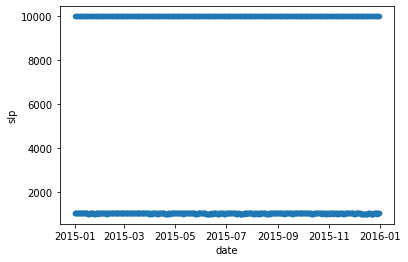

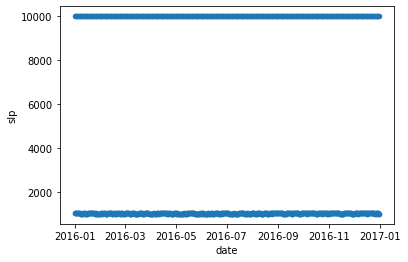

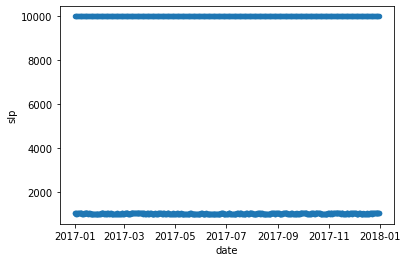

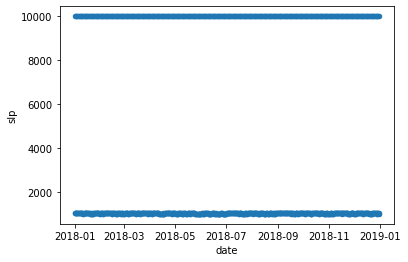

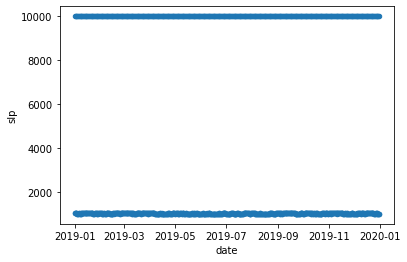

In [ ]:
for year in weather:
  year.plot(x = 'date', y = 'slp', kind = 'scatter')

In [ ]:
stn1 = weather[0].loc[weather[0]['stn'] == '725300']
stn2 = weather[0].loc[weather[0]['stn'] == '725340']
stn3 = weather[0].loc[weather[0]['stn'] == '722126']

In [18]:
stn1 = weather[0].loc[weather[0]['stn'] == '725300']
stn2 = weather[0].loc[weather[0]['stn'] == '725340']
stn3 = weather[0].loc[weather[0]['stn'] == '722126']

missing_values = {
'temp': 9999.9,
'dewp': 9999.9,
'slp': 9999.9,
'stp': 9999.9,
'visib': 999.9,
'wdsp': 999.9,
'mxpsd': 999.9,
'gust': 999.9,
'max': 9999.9,
'min': 9999.9,
'prcp': 99.99,
'sndp': 999.9}

# for col in missing_values:
#   print(col + ':')
#   missing1 = stn1['date'].loc[stn1[col] == missing_values[col]]
#   if len(missing1) > 0:
#     temp = stn2[stn2['date'].isin(missing1)]
#     missing2 = temp['date'].loc[temp[col] == missing_values[col]]
#     if len(missing2) > 0:
#       temp = stn3[stn3['date'].isin(missing2)]
#       missing3 = temp['date'].loc[temp[col] == missing_values[col]]
#       print(missing3)
#   print()

import numpy as np

for col in missing_values:
  print(col + ':')
  values1 = stn1[col].replace([0, missing_values[col]], np.NaN)
  values2 = stn2[col].replace([0, missing_values[col]], np.NaN)
  values3 = stn3[col].replace([0, missing_values[col]], np.NaN)
  values2 = stn1[col]
  print(values1)
  print(values2)

# do the replace above but on df as a whole
# then mean the values in col where date is the same (groupby date?)

temp:
0       19.9
3       25.7
6       31.5
9       29.0
14       2.2
        ... 
1080    38.4
1085    33.5
1087    33.5
1089    28.8
1092    27.0
Name: temp, Length: 365, dtype: float64
0       19.9
3       25.7
6       31.5
9       29.0
14       2.2
        ... 
1080    38.4
1085    33.5
1087    33.5
1089    28.8
1092    27.0
Name: temp, Length: 365, dtype: float64
dewp:
0        6.0
3       16.0
6       27.0
9       26.1
14      -7.4
        ... 
1080    36.0
1085    27.4
1087    31.1
1089    23.6
1092    21.3
Name: dewp, Length: 365, dtype: float64
0        6.0
3       16.0
6       27.0
9       26.1
14      -7.4
        ... 
1080    36.0
1085    27.4
1087    31.1
1089    23.6
1092    21.3
Name: dewp, Length: 365, dtype: float64
slp:
0       1019.3
3       1023.3
6       1017.7
9       1012.9
14      1034.9
         ...  
1080    1021.6
1085    1023.7
1087    1008.3
1089    1021.9
1092    1023.9
Name: slp, Length: 365, dtype: float64
0       1019.3
3       1023.3
6       1017.7
9 

stn1 missing:
gust
max
min

In [ ]:
stn3.loc[stn3['sndp'] == 999.9]

,stn,mo,temp,dewp,slp,stp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,date
2,722126,01,20.1,7.3,9999.9,996.2,10.0,13.4,18.1,24.1,30.4,5.4,0.00,999.9,0,0,0,0,0,0,2015-01-01
5,722126,01,25.7,17.2,9999.9,1000.5,10.0,4.3,14.0,18.1,34.3,14.7,0.00,999.9,0,0,0,0,0,0,2015-01-02
7,722126,01,32.0,28.6,9999.9,994.3,5.3,3.3,7.0,999.9,35.1,15.4,0.02,999.9,0,1,1,0,0,0,2015-01-03
11,722126,01,31.2,30.1,9999.9,988.8,2.1,5.7,15.0,22.9,35.1,16.2,0.37,999.9,1,1,1,0,0,0,2015-01-04
13,722126,01,4.5,-3.6,9999.9,1011.3,10.0,9.7,15.9,22.0,15.3,-2.7,0.00,999.9,0,0,1,0,0,0,2015-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,722126,12,41.1,38.2,9999.9,997.3,7.2,10.9,22.0,32.1,44.6,35.4,0.61,999.9,0,1,0,0,0,0,2015-12-27
1083,722126,12,34.2,29.4,9999.9,997.6,7.1,12.8,19.0,28.0,43.3,31.6,0.01,999.9,0,1,1,0,0,0,2015-12-28
1086,722126,12,34.8,31.6,9999.9,984.8,9.3,13.0,21.0,28.9,41.0,31.6,1.81,999.9,0,1,1,0,0,0,2015-12-29
1090,722126,12,30.2,25.0,9999.9,999.4,9.6,6.2,13.0,17.1,39.9,29.3,0.00,999.9,0,0,1,0,0,0,2015-12-30


In [ ]:
# Are -20 dewps legit? looks ok.
weather[4].loc[weather[4]['dewp'] <= -10]

,stn,mo,temp,dewp,slp,stp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,date
87,722126,01,-12.3,-22.6,9999.9,998.8,9.4,15.5,22.0,28.0,0.9,-21.5,0.00,999.9,0,0,1,0,0,0,2019-01-30
88,725340,01,-13.5,-24.6,1025.1,999.1,10.0,15.8,19.0,28.9,0.0,-22.0,0.00,5.9,0,0,0,0,0,0,2019-01-30
89,725300,01,-14.6,-23.8,1022.2,996.0,9.8,14.4,18.1,28.0,10.0,-23.1,0.00,7.9,0,0,1,0,0,0,2019-01-30
90,722126,01,-12.9,-22.1,9999.9,6.7,9.8,3.7,9.9,15.0,-1.8,-24.2,99.99,999.9,0,0,1,0,0,0,2019-01-31
91,725340,01,-12.5,-22.2,1032.8,6.4,9.1,7.7,12.0,22.0,-2.0,-20.0,0.00,5.9,0,0,1,0,0,0,2019-01-31
92,725300,01,-15.0,-23.0,1030.7,3.5,9.9,7.5,13.0,20.0,-4.0,-22.0,0.00,7.9,0,0,1,0,0,0,2019-01-31


In [ ]:
# Save weather data to CSV files.

names = ['weather_2015', 'weather_2016', 'weather_2017', 'weather_2018', 'weather_2019']

for index in range(len(names)):
  with open('/gdrive/My Drive/{}.csv'.format(names[index]), 'w') as f:
    weather[index].to_csv(f)